<a href="https://colab.research.google.com/github/mefy-Aruna/DIABETES_NEW/blob/main/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing filtered data


In [8]:
import pandas as pd
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
import lightgbm as lgb
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
df = pd.read_excel(r'filtered.xlsx')
df

FileNotFoundError: ignored

In [ ]:
df.to_csv('filtered.csv',index=False)


In [ ]:
data = pd.read_csv(r'filtered.csv')
data

,gender,age,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,t_chol,glucose,trigs,a1c,glucose.1,Diabetes
0,1,21,18.2,82.0,96.0,50.0,11.77,118.0,82.0,54.0,5.0,88.0,0.0
1,0,21,25.9,93.7,110.0,60.0,2.37,172.0,81.0,83.0,5.2,88.0,0.0
2,0,21,29.5,102.3,114.0,72.0,3.73,168.0,87.0,256.0,5.1,NaN,0.0
3,0,21,17.9,69.1,108.0,62.0,3.74,144.0,91.0,57.0,5.1,95.0,0.0
4,0,21,30.6,101.6,134.0,64.0,3.13,104.0,89.0,70.0,6.0,95.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,32.8,115.9,130.0,64.0,11.43,171.0,126.0,130.0,6.5,134.0,1.0
5202,0,77,32.9,122.2,NaN,NaN,1375.00,NaN,NaN,NaN,6.2,98.0,0.0
5203,0,77,39.2,NaN,136.0,62.0,33.20,197.0,101.0,169.0,6.3,NaN,1.0
5204,1,77,36.5,119.5,128.0,74.0,3.92,181.0,103.0,67.0,6.2,103.0,0.0


In [ ]:
y = data.iloc[:, 12].values


# Imputation

In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
pip install mice

  Created wheel for mice: filename=mice-0.0.1a0-cp36-none-any.whl size=1045 sha256=3c76b28ad2685e1b89763c6bf4abb929d58c089eaff3474feade319998b3a5e2
  Stored in directory: /root/.cache/pip/wheels/6c/e7/4f/1b0c52cfdb6dc95dd0ba1459459f8e4ed33cab25eccdd78d65
Successfully built mice


In [ ]:
pip install fancyimpute

In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
mice_impute = IterativeImputer()

In [ ]:
mice_data = mice_impute.fit_transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
mice_data

array([[  1.        ,  21.        ,  18.2       , ...,   5.        ,
         88.        ,   0.        ],
       [  0.        ,  21.        ,  25.9       , ...,   5.2       ,
         88.        ,   0.        ],
       [  0.        ,  21.        ,  29.5       , ...,   5.1       ,
         94.16074483,   0.        ],
       ...,
       [  0.        ,  77.        ,  39.2       , ...,   6.3       ,
        106.72079006,   1.        ],
       [  1.        ,  77.        ,  36.5       , ...,   6.2       ,
        103.        ,   0.        ],
       [  1.        ,  77.        ,  34.8       , ...,   5.7       ,
         96.8663047 ,   1.        ]])

In [2]:
data_n = pd.DataFrame(mice_data)
data_n.to_csv("miceDataset.csv", index=False, header=False)

NameError: ignored

In [135]:
data = pd.read_csv(r'miceDataset.csv')

In [ ]:
data1 = pd.read_csv(r'miceDataset.csv')

In [98]:
data

,gender,age,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,t_chol,glucose,trigs,a1c,glucose.1,Diabetes
0,1,21,18.2,82.000000,96.000000,50.00000,11.77,118.000000,82.000000,54.000000,5.0,88.000000,0.0
1,0,21,25.9,93.700000,110.000000,60.00000,2.37,172.000000,81.000000,83.000000,5.2,88.000000,0.0
2,0,21,29.5,102.300000,114.000000,72.00000,3.73,168.000000,87.000000,256.000000,5.1,94.160745,0.0
3,0,21,17.9,69.100000,108.000000,62.00000,3.74,144.000000,91.000000,57.000000,5.1,95.000000,0.0
4,0,21,30.6,101.600000,134.000000,64.00000,3.13,104.000000,89.000000,70.000000,6.0,95.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,32.8,115.900000,130.000000,64.00000,11.43,171.000000,126.000000,130.000000,6.5,134.000000,1.0
5202,0,77,32.9,122.200000,140.666578,76.05274,1375.00,207.939424,91.927995,205.687652,6.2,98.000000,0.0
5203,0,77,39.2,128.090281,136.000000,62.00000,33.20,197.000000,101.000000,169.000000,6.3,106.720790,1.0
5204,1,77,36.5,119.500000,128.000000,74.00000,3.92,181.000000,103.000000,67.000000,6.2,103.000000,0.0


# PRE-PROCESSING

In [99]:
x = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values
x
y

array([0., 0., 0., ..., 1., 0., 1.])

In [100]:
ynew=[]


In [101]:
for i in y:
  if i>0.5:
    add=1
    ynew.append(add)
  elif i<0.5:
    add=0
    ynew.append(add)

ynew


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#gender	age Trigs	bmi	waist_cm	sys_bp	dia_bp	alb_cr_ratio	t_chol	glucose	a1c	glucose.1	Diabetes

Gender: prediabetes=47.8% (of 226), Diabetes = 52% (of 275)
Age: prediabetes = (60)34-85, Diabetes= (64)24-84yrs
Trigs: Normal = 0.1-0.7, Pre=(1.3) 0.5-5.3, Diabetes =(1.5) 0.4-7.7
BMI:normal = 28 ± 3, pre= 	29 ± 1
Waist_cm:normal = 89 ± 5, pre=	99 ± 2
sys_bp:normal=120 ± 4,pre=	131 ± 7
dia_bp:normal =74 ± 1,	77 ± 4
(serum)glucose.1:pre=140-200
(serum) glucose: normal=<140, pre=140-199, diabetes> 200

alb_cr_ratio:pre=9.6 (2.3–730.7),dia =	15.8 (2.4–1,242.7)
t_chol:Normal = 2.6–5.2,pre=(5.4) 2.9–8.9, (4.6)2.5–7.5	
(fasting)glucose:Norm=3.9–5.5,Pre=5.9(4.2–6.9),Dia=7.7(3.6–21.3)
fasting glucose: normal=95 ± 10,prediabetes:	101 ± 2
fasting = normal < 100, pre=100-125, diabetes>126
A1C:normal= 4-5.6, pre=(5.7) 4.5–8.0, dia=(7)4.5–8.0

https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20fasting%20blood%20sugar%20level,Oral%20glucose%20tolerance%20test.

# Feature1: Fasting Glucose

In [102]:
data['Glucose_Output'] = data['glucose'].apply(lambda x: 'diabetes' if x > 125 else 'prediabetes' if x > 99 and x <= 125 else 'normal' if x > 70 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['Glucose_Output'] = data['Glucose_Output'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature1.csv',index=False, header=True)

In [103]:
data1 = pd.read_csv('feature1.csv')
data1.head()
data1 = data1[['glucose','Glucose_Output']]
data1.head()

,glucose,Glucose_Output
0,82.0,0
1,81.0,0
2,87.0,0
3,91.0,0
4,89.0,0


In [104]:
data1.to_csv('Feature1.csv', index=False)
data1


,glucose,Glucose_Output
0,82.000000,0
1,81.000000,0
2,87.000000,0
3,91.000000,0
4,89.000000,0
...,...,...
5201,126.000000,1
5202,91.927995,0
5203,101.000000,2
5204,103.000000,2


In [105]:
x1 = data1.iloc[:, 0:1].values
y1 = data1.iloc[:, 1].values
y1
x1

array([[ 82.],
       [ 81.],
       [ 87.],
       ...,
       [101.],
       [103.],
       [ 93.]])

In [61]:
print(x1.shape)


(5206, 1)


In [36]:
from sklearn.model_selection import train_test_split


In [89]:
splitRatio = 0.01

x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = splitRatio)
x_train

array([[ 87.],
       [ 85.],
       [ 91.],
       ...,
       [160.],
       [ 85.],
       [ 99.]])

In [106]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression


In [107]:
model =  LogisticRegression()
model.fit(x1,y1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
prediction = model.predict_proba(x1)
prediction

array([[0.95963746, 0.0030454 , 0.03731714],
       [0.9660719 , 0.00245571, 0.03147239],
       [0.90591345, 0.00871909, 0.08536746],
       ...,
       [0.42763043, 0.09196545, 0.48040412],
       [0.34061616, 0.11417215, 0.54521169],
       [0.76393027, 0.02783906, 0.20823068]])

In [111]:
y1

array([0, 0, 0, ..., 2, 2, 0])

In [67]:
#predictionGlucose = prediction.astype(int)


In [112]:
outGlucose=pd.DataFrame(prediction, columns=['0','1','2'])
outGlucose.to_csv('glucosePredictions.csv',index=False, header=True)

In [113]:
gluout = pd.read_csv('glucosePredictions.csv')
gluout


,0,1,2
0,0.959637,0.003045,0.037317
1,0.966072,0.002456,0.031472
2,0.905913,0.008719,0.085367
3,0.823257,0.019249,0.157494
4,0.870119,0.013053,0.116828
...,...,...,...
5201,0.006664,0.367731,0.625604
5202,0.797328,0.022905,0.179767
5203,0.427630,0.091965,0.480404
5204,0.340616,0.114172,0.545212


# Feature 2: Age

Age: prediabetes = (60)34-85, Diabetes= (64)24-84yrs


In [136]:
data['AgeOutput'] = data['age'].apply(lambda x: 'diabetes' if 45 <= x  else 'prediabetes' if x >= 25 and x <= 44 else 'normal' if x < 25 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['AgeOutput'] = data['AgeOutput'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature2.csv',index=False, header=True)

In [137]:
dataread = pd.read_csv('feature2.csv')
dataread


,gender,age,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,t_chol,glucose,trigs,a1c,glucose.1,Diabetes,AgeOutput
0,1,21,18.2,82.000000,96.000000,50.00000,11.77,118.000000,82.000000,54.000000,5.0,88.000000,0.0,0
1,0,21,25.9,93.700000,110.000000,60.00000,2.37,172.000000,81.000000,83.000000,5.2,88.000000,0.0,0
2,0,21,29.5,102.300000,114.000000,72.00000,3.73,168.000000,87.000000,256.000000,5.1,94.160745,0.0,0
3,0,21,17.9,69.100000,108.000000,62.00000,3.74,144.000000,91.000000,57.000000,5.1,95.000000,0.0,0
4,0,21,30.6,101.600000,134.000000,64.00000,3.13,104.000000,89.000000,70.000000,6.0,95.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,32.8,115.900000,130.000000,64.00000,11.43,171.000000,126.000000,130.000000,6.5,134.000000,1.0,1
5202,0,77,32.9,122.200000,140.666578,76.05274,1375.00,207.939424,91.927995,205.687652,6.2,98.000000,0.0,1
5203,0,77,39.2,128.090281,136.000000,62.00000,33.20,197.000000,101.000000,169.000000,6.3,106.720790,1.0,1
5204,1,77,36.5,119.500000,128.000000,74.00000,3.92,181.000000,103.000000,67.000000,6.2,103.000000,0.0,1


In [138]:
data2 = pd.read_csv('feature2.csv')
data2.head()
data2 = data2[['age','AgeOutput']]
data2.head()

,age,AgeOutput
0,21,0
1,21,0
2,21,0
3,21,0
4,21,0


In [139]:
data2.to_csv('Feature2.csv', index=False)
data2


,age,AgeOutput
0,21,0
1,21,0
2,21,0
3,21,0
4,21,0
...,...,...
5201,77,1
5202,77,1
5203,77,1
5204,77,1


In [140]:
x2 = data2.iloc[:, 0:1].values
y2 = data2.iloc[:, 1].values
y2

array([0, 0, 0, ..., 1, 1, 1])

In [141]:
model =  LogisticRegression()
model.fit(x2,y2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
prediction = model.predict_proba(x2)


In [143]:
outAge=pd.DataFrame(prediction, columns=['0','1','2'])
outAge.to_csv('AgePredictions.csv',index=False, header=True)

Try RANDOM FOREST also

# feature 3: BMI 

In [208]:
data = pd.read_csv(r'miceDataset.csv')

In [210]:
data['BMI_Output'] = data['bmi'].apply(lambda x: 'diabetes' if x >= 30 else 'prediabetes' if x > 24 and x < 30 else 'normal' if x < 25 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['BMI_Output'] = data['BMI_Output'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature3.csv',index=False, header=True)

In [211]:
data3 = pd.read_csv('feature3.csv')

data3 = data3[['bmi','BMI_Output']]
data3.head()

,bmi,BMI_Output
0,18.2,0
1,25.9,2
2,29.5,2
3,17.9,0
4,30.6,1


In [212]:
x3 = data1.iloc[:, 0:1].values
y3 = data1.iloc[:, 1].values
y3
x3

array([[ 82.],
       [ 81.],
       [ 87.],
       ...,
       [101.],
       [103.],
       [ 93.]])

In [213]:
model =  LogisticRegression()
model.fit(x3,y3)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
prediction = model.predict_proba(x3)


In [215]:
outbmi=pd.DataFrame(prediction, columns=['0','1','2'])
outbmi.to_csv('BMIPredictions.csv',index=False, header=True)

# Feature 4: Sys_BP

sys_bp:normal=<124,pre=124-138, diabetes >139

In [218]:
data['SysOutput'] = data['sys_bp'].apply(lambda x: 'diabetes' if x > 138 else 'prediabetes' if x > 123 and x <= 138 else 'normal' if x <124 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['SysOutput'] = data['SysOutput'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature4.csv',index=False, header=True)

In [219]:
data4 = pd.read_csv('feature4.csv')
data4.head()
data4 = data4[['sys_bp','SysOutput']]
data4.head()

,sys_bp,SysOutput
0,96.0,0
1,110.0,0
2,114.0,0
3,108.0,0
4,134.0,2


In [224]:
data4.to_csv('Feature4.csv', index=False)
data4


,sys_bp,SysOutput
0,96.000000,0
1,110.000000,0
2,114.000000,0
3,108.000000,0
4,134.000000,2
...,...,...
5201,130.000000,2
5202,140.666578,1
5203,136.000000,2
5204,128.000000,2


In [225]:
x4 = data4.iloc[:, 0:1].values
y4 = data4.iloc[:, 1].values
y4
x4

array([[ 96.],
       [110.],
       [114.],
       ...,
       [136.],
       [128.],
       [150.]])

In [226]:
model =  LogisticRegression()
model.fit(x4,y4)
prediction = model.predict_proba(x4)
prediction


array([[1.00000000e+000, 2.12373863e-128, 3.64579538e-058],
       [1.00000000e+000, 1.23539583e-075, 2.19943562e-028],
       [1.00000000e+000, 1.47040221e-060, 7.09628349e-020],
       ...,
       [2.24387606e-028, 2.71894305e-005, 9.99972811e-001],
       [2.33587759e-011, 1.99798071e-018, 1.00000000e+000],
       [1.41871019e-076, 1.00000000e+000, 3.81418698e-019]])

In [227]:
outsysbp=pd.DataFrame(prediction, columns=['0','1','2'])
outsysbp.to_csv('sysBPPredictions.csv',index=False, header=True)

# Feature 5: Diastolic BP

dia_bp:normal =74 ± 1, 77 ± 4 

In [231]:
data = pd.read_csv(r'miceDataset.csv')
x = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values
x
y


array([0., 0., 0., ..., 1., 0., 1.])

In [235]:
data['diasOut'] = data['dia_bp'].apply(lambda x: 'diabetes' if x>81 else 'prediabetes' if x <81 and x >75 else 'normal' if x <= 75 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['diasOut'] = data['diasOut'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature5.csv',index=False, header=True)
data5 = pd.read_csv('feature5.csv')
data5 = data5[['dia_bp','diasOut']]
data5.head()
data5.to_csv('Feature5.csv', index=False)
data5
x5 = data5.iloc[:, 0:1].values
y5 = data5.iloc[:, 1].values
y5
model =  LogisticRegression()
model.fit(x5,y5)
prediction = model.predict_proba(x5)
dias=pd.DataFrame(prediction, columns=['0','1','2'])
dias.to_csv('diasBPPredictions.csv',index=False, header=True)


# Feature 6: alb_cr_ratio

pre=9.6 (2.3–730.7),dia =	15.8 (2.4–1,242.7)

In [237]:
data['albOut'] = data['alb_cr_ratio'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['albOut'] = data['albOut'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature6.csv',index=False, header=True)

data6 = pd.read_csv('feature6.csv')
data6 = data6[['alb_cr_ratio','albOut']]
data6.to_csv('Feature6.csv', index=False)

x6 = data6.iloc[:, 0:1].values
y6 = data6.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x6,y6)
prediction = model.predict_proba(x6)
alb=pd.DataFrame(prediction, columns=['0','1','2'])
alb.to_csv('albcrPredictions.csv',index=False, header=True)


ValueError: ignored

# Feature 7: WAIST

In [ ]:
data['waist'] = data['waist_cm'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['waist'] = data['waist'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature7.csv',index=False, header=True)

data7 = pd.read_csv('feature7.csv')
data7 = data7[['waist_cm','waist']]
data7.to_csv('Feature7.csv', index=False)

x7 = data7.iloc[:, 0:1].values
y7 = data7.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x7,y7)
prediction = model.predict_proba(x7)
wai=pd.DataFrame(prediction, columns=['0','1','2'])
wai.to_csv('waistPredictions.csv',index=False, header=True)


# Feature 8:A1C

In [ ]:
data['haemo'] = data['a1c'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['haemo'] = data['haemo'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature8.csv',index=False, header=True)

data8 = pd.read_csv('feature8.csv')
data8 = data8[['a1c','haemo']]
data8.to_csv('Feature8.csv', index=False)

x8 = data8.iloc[:, 0:1].values
y8 = data8.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x8,y8)
prediction = model.predict_proba(x8)
hg=pd.DataFrame(prediction, columns=['0','1','2'])
hg.to_csv('a1cPredictions.csv',index=False, header=True)


# Feature 9: Gender

In [ ]:
data['gen'] = data['gender'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['gen'] = data['gen'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature9.csv',index=False, header=True)

data9 = pd.read_csv('feature9.csv')
data9 = data9[['gender','gen']]
data9.to_csv('Feature9.csv', index=False)

x9 = data9.iloc[:, 0:1].values
y9 = data9.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x9,y9)
prediction = model.predict_proba(x9)
g=pd.DataFrame(prediction, columns=['0','1','2'])
g.to_csv('genderPredictions.csv',index=False, header=True)


#Feature 10: Trigs

In [ ]:
data['Tri'] = data['trigs'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['Tri'] = data['Tri'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature10.csv',index=False, header=True)

data10 = pd.read_csv('feature10.csv')
data10 = data10[['trigs','Tri']]
data10.to_csv('Feature10.csv', index=False)

x10 = data10.iloc[:, 0:1].values
y10 = data10.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x10,y10)
prediction = model.predict_proba(x10)
gly=pd.DataFrame(prediction, columns=['0','1','2'])
gly.to_csv('triglyPredictions.csv',index=False, header=True)


# Feature 11: t_chol

In [ ]:
data['chol'] = data['t_chol'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['chol'] = data['chol'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature11.csv',index=False, header=True)

data11 = pd.read_csv('feature11.csv')
data11 = data11[['t_chol','chol']]
data11.to_csv('Feature11.csv', index=False)

x11 = data11.iloc[:, 0:1].values
y11 = data11.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x11,y11)
prediction = model.predict_proba(x11)
choles=pd.DataFrame(prediction, columns=['0','1','2'])
choles.to_csv('CholesPredictions.csv',index=False, header=True)


# Feature 12: Serum Glucose


In [ ]:
data['serum'] = data['glucose.1'].apply(lambda x: 'diabetes' if 81 <= x  else 'prediabetes' if x >=81 and x <75 else 'normal' if x <= 75 else 'diabetes')  

data['serum'] = data['serum'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature12.csv',index=False, header=True)

data12 = pd.read_csv('feature12.csv')
data12 = data12[['glucose.1','serum']]
data12.to_csv('Feature12.csv', index=False)

x12 = data12.iloc[:, 0:1].values
y12 = data12.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x12,y12)
prediction = model.predict_proba(x12)
ser=pd.DataFrame(prediction, columns=['0','1','2'])
ser.to_csv('SerumGluPredictions.csv',index=False, header=True)


# Determination of weights by Tfidf

feature weights
https://scikit-learn.org/stable/modules/feature_extraction.html

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer


In [145]:
transformer = TfidfTransformer(smooth_idf=False)


In [146]:
tfidf = transformer.fit_transform(x,y)

In [149]:
tfidf.toarray()


array([[0.00744823, 0.09326155, 0.08082667, ..., 0.2398154 , 0.02220513,
        0.39081029],
       [0.        , 0.07596254, 0.09368713, ..., 0.30023288, 0.01880977,
        0.3183192 ],
       [0.        , 0.05607968, 0.0787786 , ..., 0.683638  , 0.01361935,
        0.25145259],
       ...,
       [0.        , 0.2085349 , 0.10616322, ..., 0.45769349, 0.01706195,
        0.2890261 ],
       [0.00525231, 0.24114128, 0.11430723, ..., 0.20982423, 0.01941657,
        0.3225656 ],
       [0.00468357, 0.21502954, 0.09718218, ..., 0.3267332 , 0.01591777,
        0.27050802]])

# Feature Importance

In [165]:
data = pd.read_csv(r'miceDataset.csv')

In [166]:
x = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values
x
y

array([0., 0., 0., ..., 1., 0., 1.])

In [167]:
ynew=[]



In [168]:
for i in y:
  if i>0.5:
    add=1
    ynew.append(add)
  elif i<0.5:
    add=0
    ynew.append(add)

ynew


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [155]:
from matplotlib import pyplot


Feature: 0, Score: 0.01521
Feature: 1, Score: 0.00135
Feature: 2, Score: -0.00028
Feature: 3, Score: 0.00181
Feature: 4, Score: 0.00084
Feature: 5, Score: -0.00098
Feature: 6, Score: -0.00002
Feature: 7, Score: -0.00127
Feature: 8, Score: 0.00097
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.18929
Feature: 11, Score: -0.00034


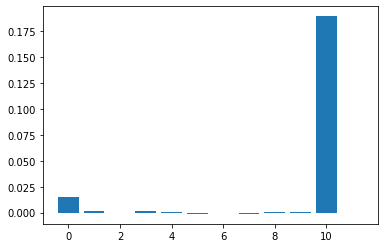

In [156]:
model = LinearRegression()
# fit the model
model.fit(x, ynew)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([j for j in range(len(importance))], importance)
pyplot.show()

In [171]:
label=['gender',	'age',	'bmi',	'waist_cm',	'sys_bp',	'dia_bp',	'alb_cr_ratio',		't_chol',		'glucose',	'trigs',	'a1c',	'glucose.1'	]

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)
# Preprocessing
########################## try without splitting the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 100,random_state=0,warm_start=True)
RFclassifier.fit(x_train, y_train)
y_pred = RFclassifier.predict(x_test)
  #print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.97      0.83      0.90       129

    accuracy                           0.98      1042
   macro avg       0.97      0.91      0.94      1042
weighted avg       0.98      0.98      0.98      1042



In [184]:

import pickle
filename = 'RF.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

[0.00320898 0.02742387 0.0212766  0.02955473 0.01910558 0.01670827
 0.03682936 0.03118109 0.1102987  0.02109187 0.52586535 0.1574556 ]


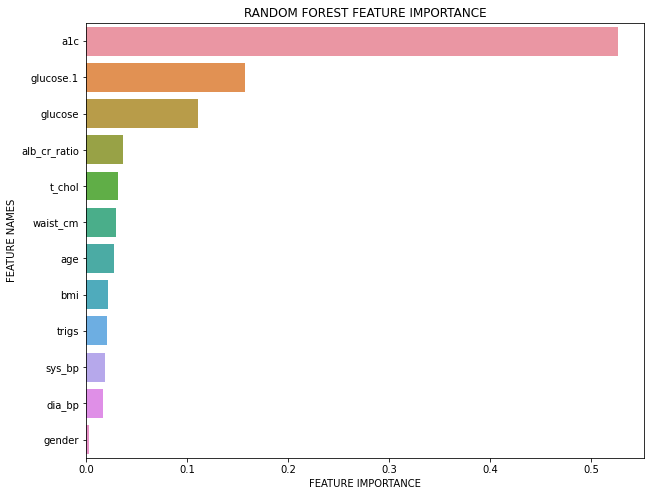

In [199]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
 
#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
 
#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(RFclassifier.feature_importances_,label,'RANDOM FOREST')
weight =RFclassifier.feature_importances_
print(weight)

In [201]:
weight[8]
weight[1]

0.027423867439744707

# Thresholding

In [174]:
glucose = pd.read_csv('glucosePredictions.csv')
glucose


,0,1,2
0,0.959637,0.003045,0.037317
1,0.966072,0.002456,0.031472
2,0.905913,0.008719,0.085367
3,0.823257,0.019249,0.157494
4,0.870119,0.013053,0.116828
...,...,...,...
5201,0.006664,0.367731,0.625604
5202,0.797328,0.022905,0.179767
5203,0.427630,0.091965,0.480404
5204,0.340616,0.114172,0.545212


In [182]:
G0=glucose.iloc[:,0]
G1=glucose.iloc[:,1]
G2=glucose.iloc[:,2]


In [183]:
Age = pd.read_csv('AgePredictions.csv')
Age


,0,1,2
0,1.000000e+00,5.299464e-63,1.930293e-09
1,1.000000e+00,5.299464e-63,1.930293e-09
2,1.000000e+00,5.299464e-63,1.930293e-09
3,1.000000e+00,5.299464e-63,1.930293e-09
4,1.000000e+00,5.299464e-63,1.930293e-09
...,...,...,...
5201,6.213459e-205,1.000000e+00,7.776281e-75
5202,6.213459e-205,1.000000e+00,7.776281e-75
5203,6.213459e-205,1.000000e+00,7.776281e-75
5204,6.213459e-205,1.000000e+00,7.776281e-75


In [191]:
A0=Age.iloc[:,0]
A1=Age.iloc[:,1]
A2=Age.iloc[:,2]


G0,G1,G2 for Glucose
A0,A1,A2 for Age

In [186]:
import numpy as np

In [206]:
sum0=[]
sum1=[]
sum2=[]
res=[]
for (i,j,k,l,m,n) in zip(G0,A0,G1,A1,G2,A2):
  s0 =(i*weight[8])+(j*weight[1])
  s1 =(k*weight[8])+(l*weight[1])
  s2 =(m*weight[8])+(n*weight[1])
  result =max(s0,s1,s2)
  if result ==s0:
    add=0
  elif result ==s1:
    add=1
  else:
    add=2

  res.append(add)
  sum0.append(s0)
  sum1.append(s1)
  sum2.append(s2)

print(sum0)
print(sum1)
print(sum2)
print('result',res)


[0.1332706275622582, 0.1339803379384482, 0.12734494005821725, 0.11822806357315598, 0.12339690537063017, 0.13144459644772843, 0.06868361110227647, 0.12892688800855537, 0.07459094585112427, 0.1339803379384482, 0.07961385025190731, 0.13243229508539253, 0.12339690537063017, 0.02972039901416606, 0.05716183420208329, 0.04341106022201617, 0.1037458905316708, 0.13144459644772843, 0.07961385025190731, 0.1372753694442546, 0.1078832705465434, 0.13243229508539253, 0.13243229508539253, 0.1209768900408035, 0.0274409612854117, 0.08467922991945276, 0.12339690537063017, 0.1332706275622582, 0.11822806357315598, 0.13750340720478402, 0.1037458905316708, 0.1078832705465434, 0.13750340720478402, 0.09460149719524712, 0.0671898334669051, 0.1332706275622582, 0.12892688800855537, 0.1302845025611244, 0.09930311646186761, 0.1355109768373461, 0.13616948502204074, 0.13457985502047845, 0.12892688800855537, 0.13642179764900797, 0.13144459644772843, 0.12892688800855537, 0.12892688800855537, 0.029327724046461688, 0.127

# Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 100,random_state=0,warm_start=True)


In [ ]:
RFclassifier.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=True)

In [ ]:
y_pred = RFclassifier.predict(x_test)


In [ ]:
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print(acc)

[[890   1]
 [ 27 123]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       891
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1041
   macro avg       0.98      0.91      0.94      1041
weighted avg       0.97      0.97      0.97      1041

0.9731027857829011


In [ ]:

import pickle
filename = 'rf1.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

In [ ]:
pip install sklearn

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
roc_auc_score(y_test,y_pred)

0.909438832772166

In [ ]:
acc=0

trial 2

In [ ]:
while acc<0.98:
  x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
  RFclassifier.fit(x_train, y_train)
  y_pred = RFclassifier.predict(x_test)
  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print(acc)




In [ ]:
  print('confusion matrix',confusion_matrix(y_test, y_pred))
  print('Classification report',classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print('accuracy',acc)

confusion matrix [[903   2]
 [ 17 119]]
Classification report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       0.98      0.88      0.93       136

    accuracy                           0.98      1041
   macro avg       0.98      0.94      0.96      1041
weighted avg       0.98      0.98      0.98      1041

accuracy 0.9817483189241114


In [ ]:
print('AUC score',roc_auc_score(y_test,y_pred))


AUC score 0.9363950276243094


In [ ]:

import pickle
filename = 'rf2.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

In [ ]:
import pandas as pd
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
import lightgbm as lgb
from sklearn.model_selection import train_test_split




# LGBM

In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)


In [ ]:
lgb_clf.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=4, num_leaves=31,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
y_pred = lgb_clf.predict(x_test)


In [ ]:
import pickle

In [ ]:
pickle.dump(lgb_clf, open('lgbClassifier.pkl', 'wb'))


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       886
           1       0.97      0.81      0.88       155

    accuracy                           0.97      1041
   macro avg       0.97      0.90      0.93      1041
weighted avg       0.97      0.97      0.97      1041



# BORUTA SELECTOR + RF

In [ ]:
pip install boruta

     |████████████████████████████████| 61kB 1.7MB/s 


In [ ]:
from boruta import BorutaPy
from datetime import datetime
from __future__ import print_function



In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced')

In [ ]:
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(x_train, y_train)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	12
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	27
Tentative: 	

In [ ]:
data

,gender,age,race,education,marital,income,household_size,insurance,private_insur,gen_health,asthma,chf,cad,mi,cva,copd,cancer,diabetes,depression,hypertension,smoker,drinks_day,weight_kg,height_cm,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,alb,alt,ast,alk_phos,bun,ca,cpk,t_chol,bicarb,cr,glucose,iron,ldh,phos,t_bilirubin,t_protein,u_acid,sodium,potassium,chloride,glob,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio,Diabetes
0,1,21,7,2.0,6.0,1.0,2,1,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,15.0,50.8,167.1,18.2,82.0,96.0,50.0,11.77,4.4,15.0,16.0,44.0,7.0,8.8,35.0,118.0,25.0,0.44,82.0,165.0,75.0,4.2,0.8,7.3,3.3,138.0,3.4,105.0,2.9,54.0,6.0,12.7,36.1,157.0,0.654,5.0,88.0,7.27,47.0,49.0,50.3,3650.0,2846.0,0.779726,0.0
1,0,21,1,2.0,6.0,3.0,4,2,0.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,12.0,72.8,167.5,25.9,93.7,110.0,60.0,2.37,4.5,25.0,24.0,112.0,13.0,9.6,214.0,172.0,27.0,0.81,81.0,119.0,137.0,3.8,1.2,7.3,7.8,137.0,3.5,102.0,2.8,83.0,6.9,15.1,44.4,226.0,0.221,5.2,88.0,12.01,40.0,112.0,90.1,4327.0,3629.0,0.838687,0.0
2,0,21,2,3.0,5.0,4.0,3,1,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,12.0,81.0,165.6,29.5,102.3,114.0,72.0,3.73,4.5,23.0,21.0,103.0,10.0,9.3,73.0,168.0,25.0,0.82,87.0,68.0,112.0,4.4,0.4,7.5,5.0,138.0,3.5,104.0,3.0,256.0,8.2,14.4,41.3,266.0,0.011,5.1,0.0,0.00,38.0,0.0,72.7,4471.0,3725.0,0.833147,0.0
3,0,21,1,2.0,5.0,4.0,4,1,0.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,12.0,56.9,178.3,17.9,69.1,108.0,62.0,3.74,4.8,18.0,23.0,65.0,10.0,9.5,151.0,144.0,26.0,0.73,91.0,63.0,87.0,4.2,0.9,7.4,5.9,136.0,3.6,102.0,2.6,57.0,6.6,14.7,43.0,206.0,16.300,5.1,95.0,3.60,55.0,73.0,86.6,5161.0,4301.0,0.833366,0.0
4,0,21,2,3.0,5.0,10.0,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,8.0,101.2,181.9,30.6,101.6,134.0,64.0,3.13,4.3,20.0,18.0,55.0,9.0,9.4,250.0,104.0,28.0,1.07,89.0,121.0,104.0,4.3,0.8,7.2,7.2,142.0,4.7,104.0,2.9,70.0,7.8,15.6,45.1,306.0,212.000,6.0,95.0,14.58,39.0,55.0,94.4,6250.0,5168.0,0.826880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,7,5.0,5.0,2.0,1,1,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,85.6,161.5,32.8,115.9,130.0,64.0,11.43,4.2,26.0,19.0,50.0,14.0,8.9,198.0,171.0,22.0,0.73,126.0,67.0,119.0,3.1,0.7,6.9,7.6,138.0,3.9,107.0,2.7,130.0,6.1,14.2,41.8,205.0,0.269,6.5,134.0,19.13,45.0,92.0,65.2,3097.0,2249.0,0.726187,1.0
5202,0,77,4,3.0,3.0,2.0,1,2,0.0,4.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,104.6,178.3,32.9,122.2,0.0,0.0,1375.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,10.4,29.6,141.0,143.000,6.2,98.0,0.00,0.0,0.0,0.0,2872.0,1716.0,0.597493,0.0
5203,0,77,3,4.0,1.0,4.0,2,1,0.0,5.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,99.0,159.0,39.2,0.0,136.0,62.0,33.20,3.6,32.0,28.0,61.0,18.0,8.9,94.0,197.0,24.0,0.98,101.0,123.0,161.0,2.6,0.6,7.5,7.2,138.0,3.7,104.0,3.9,169.0,10.7,14.5,41.2,195.0,0.011,6.3,0.0,0.00,38.0,0.0,0.0,0.0,0.0,0.000000,1.0
5204,1,77,4,2.0,2.0,3.0,1,1,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,103.8,168.6,36.5,119.5,128.0,74.0,3.92,4.1,14.0,22.0,80.0,14.0,10.3,236.0,181.0,23.0,0.95,103.0,69.0,138.0,3.5,1.0,7.4,5.4,137.0,3.9,103.0,3.3,67.0,4.3,13.5,38.7,213.0,0.035,6.2,103.0,11.77,69.0,109.0,45.2,2060.0,1491.0,0.723786,0.0


In [ ]:
data = pd.read_csv(r'filled_Noheader.csv')
data

,gender,age,race,education,marital,income,household_size,insurance,private_insur,gen_health,asthma,chf,cad,mi,cva,copd,cancer,diabetes,depression,hypertension,smoker,drinks_day,weight_kg,height_cm,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,alb,alt,ast,alk_phos,bun,ca,cpk,t_chol,bicarb,cr,glucose,iron,ldh,phos,t_bilirubin,t_protein,u_acid,sodium,potassium,chloride,glob,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio
0,1,21,7,2,6,1,2,1,0,3,2,2,2,2,2,2,2,2,0,2,1,15,50.8,167.1,18.2,82.0,96,50,11.77,4.4,15,16,44,7,8.8,35,118,25,0.44,82,165,75,4.2,0.8,7.3,3.3,138,3.4,105,2.9,54,6.0,12.7,36.1,157,0.654,5.0,88,7.27,47,49,50.3,3650,2846,0.779726
1,0,21,1,2,6,3,4,2,0,3,1,2,2,2,2,2,2,2,1,2,2,12,72.8,167.5,25.9,93.7,110,60,2.37,4.5,25,24,112,13,9.6,214,172,27,0.81,81,119,137,3.8,1.2,7.3,7.8,137,3.5,102,2.8,83,6.9,15.1,44.4,226,0.221,5.2,88,12.01,40,112,90.1,4327,3629,0.838687
2,0,21,2,3,5,4,3,1,1,3,2,2,2,2,2,2,2,2,0,2,1,12,81.0,165.6,29.5,102.3,114,72,3.73,4.5,23,21,103,10,9.3,73,168,25,0.82,87,68,112,4.4,0.4,7.5,5.0,138,3.5,104,3.0,256,8.2,14.4,41.3,266,0.011,5.1,0,0.00,38,0,72.7,4471,3725,0.833147
3,0,21,1,2,5,4,4,1,0,4,2,2,2,2,2,2,2,2,3,2,2,12,56.9,178.3,17.9,69.1,108,62,3.74,4.8,18,23,65,10,9.5,151,144,26,0.73,91,63,87,4.2,0.9,7.4,5.9,136,3.6,102,2.6,57,6.6,14.7,43.0,206,16.300,5.1,95,3.60,55,73,86.6,5161,4301,0.833366
4,0,21,2,3,5,10,2,1,1,2,2,2,2,2,2,2,2,2,0,2,1,8,101.2,181.9,30.6,101.6,134,64,3.13,4.3,20,18,55,9,9.4,250,104,28,1.07,89,121,104,4.3,0.8,7.2,7.2,142,4.7,104,2.9,70,7.8,15.6,45.1,306,212.000,6.0,95,14.58,39,55,94.4,6250,5168,0.826880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,7,5,5,2,1,1,0,2,2,2,2,2,2,2,2,1,0,2,1,0,85.6,161.5,32.8,115.9,130,64,11.43,4.2,26,19,50,14,8.9,198,171,22,0.73,126,67,119,3.1,0.7,6.9,7.6,138,3.9,107,2.7,130,6.1,14.2,41.8,205,0.269,6.5,134,19.13,45,92,65.2,3097,2249,0.726187
5202,0,77,4,3,3,2,1,2,0,4,1,0,2,2,1,1,2,1,0,1,1,0,104.6,178.3,32.9,122.2,0,0,1375.00,0.0,0,0,0,0,0.0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,5.1,10.4,29.6,141,143.000,6.2,98,0.00,0,0,0.0,2872,1716,0.597493
5203,0,77,3,4,1,4,2,1,0,5,2,1,1,1,1,2,2,1,0,1,1,0,99.0,159.0,39.2,0.0,136,62,33.20,3.6,32,28,61,18,8.9,94,197,24,0.98,101,123,161,2.6,0.6,7.5,7.2,138,3.7,104,3.9,169,10.7,14.5,41.2,195,0.011,6.3,0,0.00,38,0,0.0,0,0,0.000000
5204,1,77,4,2,2,3,1,1,0,3,2,2,2,2,2,2,2,1,1,1,1,0,103.8,168.6,36.5,119.5,128,74,3.92,4.1,14,22,80,14,10.3,236,181,23,0.95,103,69,138,3.5,1.0,7.4,5.4,137,3.9,103,3.3,67,4.3,13.5,38.7,213,0.035,6.2,103,11.77,69,109,45.2,2060,1491,0.723786


In [ ]:
print ('\n Initial features: ', data.columns.tolist() )

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)
feature_df = pd.DataFrame(data.columns.tolist(), columns=['features'])

feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))
feature_df.to_csv('boruta-feature-ranking.csv', index=False)

# check ranking of features
print ('\n Feature ranking:')
print (boruta_selector.ranking_)

# check selected features
print ('\n Selected features:')
print (boruta_selector.support_)

# check weak features
print ('\n Support for weak features:')
print (boruta_selector.support_weak_)

selected = data.columns[boruta_selector.support_]
train = data[selected]
data['Outcome'] = y
train.to_csv('Borutafiltered.csv',index=False)



 Initial features:  ['gender', 'age', 'race', 'education', 'marital', 'income', 'household_size', 'insurance', 'private_insur', 'gen_health', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd', 'cancer', 'diabetes', 'depression', 'hypertension', 'smoker', 'drinks_day', 'weight_kg', 'height_cm', 'bmi', 'waist_cm', 'sys_bp', 'dia_bp', 'alb_cr_ratio', 'alb', 'alt', 'ast', 'alk_phos', 'bun', 'ca', 'cpk', 't_chol', 'bicarb', 'cr', 'glucose', 'iron', 'ldh', 'phos', 't_bilirubin', 't_protein', 'u_acid', 'sodium', 'potassium', 'chloride', 'glob', 'trigs', 'wbc', 'hgb', 'hct', 'platelets', 's_cotinine', 'a1c', 'glucose.1', 'insulin', 'hdl', 'ldl_chol', 'grip_strength', 'fvc', 'fev1', 'fev1_fvc_ratio']

 Number of selected features:
27

 Top 27 features:
        features  rank
0       alk_phos     1
1             cr     1
2            bun     1
3           fev1     1
4        glucose     1
5   alb_cr_ratio     1
6         sys_bp     1
7       waist_cm     1
8            bmi     1
9      weight_kg     

In [ ]:
filtered = pd.read_csv(r'Borutafiltered.csv')
filtered

,age,gen_health,diabetes,hypertension,weight_kg,bmi,waist_cm,sys_bp,alb_cr_ratio,alk_phos,bun,t_chol,cr,glucose,chloride,glob,trigs,wbc,hgb,hct,platelets,a1c,glucose.1,insulin,hdl,fvc,fev1
0,21,3,2,2,50.8,18.2,82.0,96,11.77,44,7,118,0.44,82,105,2.9,54,6.0,12.7,36.1,157,5.0,88,7.27,47,3650,2846
1,21,3,2,2,72.8,25.9,93.7,110,2.37,112,13,172,0.81,81,102,2.8,83,6.9,15.1,44.4,226,5.2,88,12.01,40,4327,3629
2,21,3,2,2,81.0,29.5,102.3,114,3.73,103,10,168,0.82,87,104,3.0,256,8.2,14.4,41.3,266,5.1,0,0.00,38,4471,3725
3,21,4,2,2,56.9,17.9,69.1,108,3.74,65,10,144,0.73,91,102,2.6,57,6.6,14.7,43.0,206,5.1,95,3.60,55,5161,4301
4,21,2,2,2,101.2,30.6,101.6,134,3.13,55,9,104,1.07,89,104,2.9,70,7.8,15.6,45.1,306,6.0,95,14.58,39,6250,5168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,77,2,1,2,85.6,32.8,115.9,130,11.43,50,14,171,0.73,126,107,2.7,130,6.1,14.2,41.8,205,6.5,134,19.13,45,3097,2249
5202,77,4,1,1,104.6,32.9,122.2,0,1375.00,0,0,0,0.00,0,0,0.0,0,5.1,10.4,29.6,141,6.2,98,0.00,0,2872,1716
5203,77,5,1,1,99.0,39.2,0.0,136,33.20,61,18,197,0.98,101,104,3.9,169,10.7,14.5,41.2,195,6.3,0,0.00,38,0,0
5204,77,3,1,1,103.8,36.5,119.5,128,3.92,80,14,181,0.95,103,103,3.3,67,4.3,13.5,38.7,213,6.2,103,11.77,69,2060,1491


In [ ]:
new_x = filtered.iloc[:, 0:26].values
new_x


array([[2.100e+01, 3.000e+00, 2.000e+00, ..., 7.270e+00, 4.700e+01,
        3.650e+03],
       [2.100e+01, 3.000e+00, 2.000e+00, ..., 1.201e+01, 4.000e+01,
        4.327e+03],
       [2.100e+01, 3.000e+00, 2.000e+00, ..., 0.000e+00, 3.800e+01,
        4.471e+03],
       ...,
       [7.700e+01, 5.000e+00, 1.000e+00, ..., 0.000e+00, 3.800e+01,
        0.000e+00],
       [7.700e+01, 3.000e+00, 1.000e+00, ..., 1.177e+01, 6.900e+01,
        2.060e+03],
       [7.700e+01, 3.000e+00, 1.000e+00, ..., 0.000e+00, 5.100e+01,
        1.207e+03]])

In [ ]:

X_t, X_val, y_t, y_val = train_test_split(new_x, y)



In [ ]:
rf2 = RandomForestClassifier( n_estimators=500, max_depth=6)
rf2.fit(X_t, y_t)
y_pred = rf2.predict(X_val)


In [ ]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
pickle.dump(rf2, open('BorutaRF.pkl', 'wb'))


In [ ]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1111
         1.0       0.95      0.94      0.95       191

    accuracy                           0.98      1302
   macro avg       0.97      0.97      0.97      1302
weighted avg       0.98      0.98      0.98      1302



# LASSO + CrossVal

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso= Lasso()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters ={'alpha':[1]}

In [ ]:
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
y_pred=lasso_regressor.predict(x_test)

In [ ]:
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.best_score_

-0.12266420014181253

In [ ]:
y_lasso=[]

In [ ]:
for i in y_pred:
  if i>0.5:
    add=1
    y_lasso.append(add)
  elif i<0.5:
    add=0
    y_lasso.append(add)

y_lasso


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(classification_report(y_test, y_lasso))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       886
           1       0.00      0.00      0.00       155

    accuracy                           0.85      1041
   macro avg       0.43      0.50      0.46      1041
weighted avg       0.72      0.85      0.78      1041



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred

array([0.1431316, 0.1431316, 0.1431316, ..., 0.1431316, 0.1431316,
       0.1431316])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV


In [ ]:
pip install sklearn

In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
y_pred=lassocv.predict(X_test)

Alpha= 8.592036019209137e-05
mse =  0.0508749742523064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.36132967438843, tolerance: 0.03145378409527467
  positive)


In [ ]:
len(y_test)

2603

In [ ]:
len(y_pred)

7810

In [ ]:
y_new=[]
i=0

In [ ]:
for i in y_pred:
  if i>0.5:
      add=1
      y_new.append(add)
  else:
      add=0
      y_new.append(add)


In [ ]:
import numpy as np


In [ ]:
y_pred=np.asarray(y_new)

In [ ]:
#print(classification_report(y_test, y_pred))


In [ ]:
for i in y_pred:
  if i>0.5:
    add=1
    y_pred_new.append(add)
  elif i<0.5:
    add=0
    y_pred_new.append(add)

y_pred_new


# LOGISTIC REGRESSION + RIDGE

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:

clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_predict=clf.predict(x_test)

In [ ]:
y_ridge=[]

In [ ]:
for i in y_predict:
  if i>0.5:
    add=1
    y_ridge.append(add)
  elif i<0.5:
    add=0
    y_ridge.append(add)

y_ridge


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [ ]:
accuracy_score(y_test,y_ridge)

0.9173871277617676

Regularization techniques are used to deal with overfitting and when the dataset is large.
So, Lasso and Ridge are not useful in our case.



# XGBOOST

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

In [ ]:


train = x_train
test = x_test

# print("Train a Gradient Boosting model")
# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.005, subsample=0.7,
#                                      min_samples_leaf=10, max_depth=7, random_state=11)
print("Train a Random Forest model")
clf = RandomForestClassifier(n_estimators=25)

clf.fit(x_train, y_train)

print("Train a XGBoost model")
params = {"objective": "reg:linear",
          "eta": 0.3,
          "max_depth": 5,
          "min_child_weight": 3,
          "silent": 1,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "seed": 1}
num_trees=250
gbm = xgb.train(params, xgb.DMatrix(x_train, y_train), num_trees)

print("Make predictions on the test set")
test_probs = (clf.predict_proba(x_test)[:,1] +
              gbm.predict(xgb.DMatrix(x_test)))/2

y_pred= clf.predict_proba(x_test)[:, 1]


Train a Random Forest model
Train a XGBoost model
Make predictions on the test set


In [ ]:
y_pred

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.92])

In [ ]:
y_pred_new=[]

In [ ]:
for i in y_pred:
  if i>0.5:
    add=1
    y_pred_new.append(add)
  elif i<0.5:
    add=0
    y_pred_new.append(add)

y_pred_new


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [ ]:
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       886
           1       0.96      0.81      0.88       155

    accuracy                           0.97      1041
   macro avg       0.96      0.90      0.93      1041
weighted avg       0.97      0.97      0.97      1041



# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
acc=0

In [ ]:
while acc<0.98:
  x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  LR_pred = LR.predict(x_test)



  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, LR_pred)
  print(acc)




0.968299711815562
0.9721421709894332
0.9702209414024976
0.9750240153698367
0.9740634005763689
0.9779058597502401
0.9702209414024976
0.968299711815562
0.962536023054755
0.9692603266090298
0.9711815561959655
0.9750240153698367
0.9702209414024976
0.9779058597502401
0.9702209414024976
0.9644572526416907
0.962536023054755
0.9673390970220941
0.9654178674351584
0.9654178674351584
0.9692603266090298
0.9711815561959655
0.9740634005763689
0.9731027857829011
0.9702209414024976
0.9702209414024976
0.9750240153698367
0.9673390970220941
0.9721421709894332
0.9644572526416907
0.9711815561959655
0.9798270893371758
0.9779058597502401
0.9615754082612872
0.9673390970220941
0.9644572526416907
0.9769452449567724
0.9769452449567724
0.9654178674351584
0.9731027857829011
0.9606147934678194
0.9702209414024976
0.968299711815562
0.9615754082612872
0.968299711815562
0.9644572526416907
0.9606147934678194
0.9654178674351584
0.9654178674351584
0.9692603266090298
0.9606147934678194
0.9596541786743515
0.9644572526416907

In [ ]:

print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))
print(accuracy_score(y_test, LR_pred))

[[884   6]
 [ 13 138]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       890
           1       0.96      0.91      0.94       151

    accuracy                           0.98      1041
   macro avg       0.97      0.95      0.96      1041
weighted avg       0.98      0.98      0.98      1041

0.9817483189241114


In [ ]:
acc=0
from sklearn.svm import SVC   # Support Vector Classifier


# SVM

In [ ]:
while acc<0.90:
  x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  SVMclassifier = SVC()
  SVMclassifier.fit(x_train, y_train)
  y_pred = SVMclassifier.predict(x_test)



  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, LR_pred)
  print(acc)
  



0.7588856868395774
0.7598463016330451
0.7531219980787704
0.7646493756003843
0.7425552353506244
0.7406340057636888
0.7665706051873199
0.7780979827089337
0.7550432276657061
0.7598463016330451
0.7531219980787704
0.7540826128722382
0.7550432276657061
0.7675312199807877
0.7675312199807877
0.7473583093179635
0.7694524495677233
0.765609990393852
0.7636887608069164
0.7627281460134486
0.7329490874159462
0.7531219980787704
0.7569644572526417
0.7560038424591738
0.7579250720461095
0.7713736791546589
0.7531219980787704
0.7617675312199808
0.7732949087415946
0.7665706051873199
0.7588856868395774
0.7627281460134486
0.7665706051873199
0.7694524495677233
0.760806916426513
0.7531219980787704
0.7694524495677233
0.7473583093179635
0.7675312199807877
0.7646493756003843
0.7627281460134486
0.7550432276657061
0.7809798270893372
0.7627281460134486
0.7761767531219981
0.7598463016330451
0.729106628242075
0.7627281460134486
0.7713736791546589


KeyboardInterrupt: ignored